In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 4.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


# Lecture 8: Random numbers

Python provides a standard library, `random`, for random number generation [here](https://docs.python.org/3/library/random.html). Numpy has a more comprehensive library [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html). For the examples below, we'll use `numpy.random`.

In [1]:
import numpy as np
import numpy.random as rng
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's define a new random number generator and set the seed

r = rng.RandomState(0)

# We can now use it to generate random numbers

n = r.rand()
print(n)

0.5488135039273248


In [2]:
# The sequence of random numbers generated by the same generator 
# with the same seed is always the same

print(np.array([n] + list(r.rand(5))))

r2 = rng.RandomState(0)
print(r2.rand(6))

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411]


### A simple example: computing the area of a circle

Let's randomly generate a set of $(x, y)$ coordinates by choosing $x$ and $y$ values uniformly in the interval $[-1, 1]$. By default, the generator produces (pseudo)random numbers uniformly distributed along the interval $[0, 1)$. So, we can transform this to the distribution that we want with a multiplication and a shift:

$$ r^\prime = 2 r - 1 $$

will be distributed uniformly between $[-1, 1)$.

We can use these shifted random numbers to compute the area of a circle. We'll generate a large set of random $(x, y)$ coordinates and count only the ones that lie within the unit circle. The total area of the interval is $2\times2=4$, so the fraction of counted coordinates will give the area of the circle divided by $4$.

This kind of technique is called [Monte Carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method).

In [7]:
# Generate the random coordinates

x = 2*r.rand(1000) - 1
y = 2*r.rand(1000) - 1

4*np.sum(x**2+y**2<1)/float(len(x))

3.172

Now, let's make a plot to see what these look like.

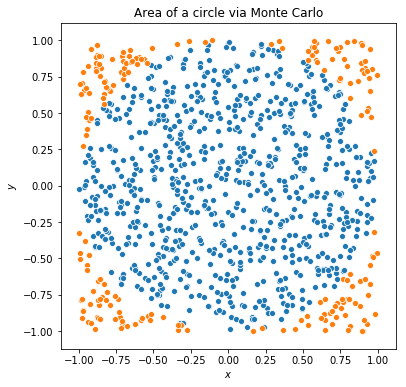

In [9]:
inside  = x**2 + y**2 < 1
outside = x**2 + y**2 > 1

dims = 6
fig, ax = plt.subplots(figsize=(dims, dims))
sns.scatterplot( x[inside],  y[inside], ax=ax)
sns.scatterplot(x[outside], y[outside], ax=ax)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title("Area of a circle via Monte Carlo");

### Slightly more tricky: volume of a hypersphere

**Exercise**: Write a routine to compute the volume of a 7-sphere with unit radius. This is not too difficult to work out analytically, but it can take a long time to compute by conventional numerical integration.

In [11]:
# Your function here!

box_area = 2**7

x1 = 2*r.rand(1000000) - 1
x2 = 2*r.rand(1000000) - 1
x3 = 2*r.rand(1000000) - 1
x4 = 2*r.rand(1000000) - 1
x5 = 2*r.rand(1000000) - 1
x6 = 2*r.rand(1000000) - 1
x7 = 2*r.rand(1000000) - 1

sphere_area = box_area * np.sum(x1**2+x2**2+x3**2+x4**2+x5**2+x6**2+x7**2<1)/float(len(x1))
print(sphere_area)

4.758528


**Answer**: The volume of the even- and odd-dimensional hyperspheres of radius $r$ are, respectively,

$$
\begin{aligned} \begin{align}
V_{2k}(r)     &= \frac{\pi^k}{k!}r^{2k}\,,\\
V_{2k + 1}(r) &= \frac{2^{k+1}\pi^k}{\left(2k + 1\right)!!}r^{2k + 1}\,.
\end{align} \end{aligned}
$$

The volume of the unit 7-sphere is then $V_7(1) = \frac{16 \pi^3}{105} \approx 4.725$.